# Abstract
This project focuses on exploring the vulnerability of machine learning classification models, specifically financial transaction fraud detection systems, to data poisoning attacks. Data poisoning is a technique used in adversarial machin learning, where an attacker is able to inject data into the model's training dataset, or alter the dataset itself, in order to manipulate the model's future behavior. We built two classification models, a model using a torch neural network with logistic regression and a decision tree classifier from scikit-learn. 

**approaches**

**results**

**GitHub links**

# Introduction
We were inspired by 

# Values Statement
We believe that the potential users of our project include machine learning engineers who wish to ensure the security and integrity of their work from 

# Materials and Methods

In [183]:
import pandas as pd

df = pd.read_csv("bankPayments.csv")
df.head()

step       customer  age gender zipcodeOri       merchant zipMerchant  \
0     0  'C1093826151'  '4'    'M'    '28007'   'M348934600'     '28007'   
1     0   'C352968107'  '2'    'M'    '28007'   'M348934600'     '28007'   
2     0  'C2054744914'  '4'    'F'    '28007'  'M1823072687'     '28007'   
3     0  'C1760612790'  '3'    'M'    '28007'   'M348934600'     '28007'   
4     0   'C757503768'  '5'    'M'    '28007'   'M348934600'     '28007'   

              category  amount  fraud  
0  'es_transportation'    4.55      0  
1  'es_transportation'   39.68      0  
2  'es_transportation'   26.89      0  
3  'es_transportation'   17.25      0  
4  'es_transportation'   35.72      0

Importing the data: 

This data set includes seven categorical variables:
Customer = the customer label for the transaction ('C' followed by a unique number for each customer)
Gender = the gender of the customer
Zip code Origin = the zip code of the customer where the transaction occurred 
Merchant = the merchant label for the transaction ('M' followed by a unique number for each customer)
Zip code Origin = the zip code of the merchant
Category = the industry assigned to the transaction
Fraud = whether the transaction was fraud

The data set also includes two quantitative variables: 
Age = how long ago (in years) the transaction occurred
Amount = the dollar amount of the transaction

In [4]:
import torch

In [184]:
import seaborn as sns
import numpy as np
from torch import nn

In [189]:
print(df["merchant"].value_counts())

merchant
'M1823072687'    299693
'M348934600'     205426
'M85975013'       26254
'M1053599405'      6821
'M151143676'       6373
'M855959430'       6098
'M1946091778'      5343
'M1913465890'      3988
'M209847108'       3814
'M480139044'       3508
'M349281107'       2881
'M1600850729'      2624
'M1535107174'      1868
'M980657600'       1769
'M78078399'        1608
'M1198415165'      1580
'M840466850'       1399
'M1649169323'      1173
'M547558035'        949
'M50039827'         916
'M1888755466'       912
'M692898500'        900
'M1400236507'       776
'M1842530320'       751
'M732195782'        608
'M97925176'         599
'M45060432'         573
'M1741626453'       528
'M1313686961'       527
'M1872033263'       525
'M1352454843'       370
'M677738360'        358
'M2122776122'       341
'M923029380'        323
'M3697346'          308
'M17379832'         282
'M1748431652'       274
'M1873032707'       250
'M2011752106'       244
'M1416436880'       220
'M1294758098'       191
'M17885

In [6]:
df1 = df[["gender", "fraud"]]
df1.groupby("gender").aggregate('sum')

fraud
gender       
'E'         7
'F'      4758
'M'      2435
'U'         0

In [7]:
df2 = df[["category", "fraud"]]
df2.groupby("category").aggregate('sum')

fraud
category                      
'es_barsandrestaurants'    120
'es_contents'                0
'es_fashion'               116
'es_food'                    0
'es_health'               1696
'es_home'                  302
'es_hotelservices'         548
'es_hyper'                 280
'es_leisure'               474
'es_otherservices'         228
'es_sportsandtoys'        1982
'es_tech'                  158
'es_transportation'          0
'es_travel'                578
'es_wellnessandbeauty'     718

In [ ]:
df3 = df[["category", "amount"]]
df3.groupby("category").aggregate('mean')

/Users/tristanmeyer/anaconda3/envs/ml-0451/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Visualizing the number of Fraudulent Transactions over different Amounts')]

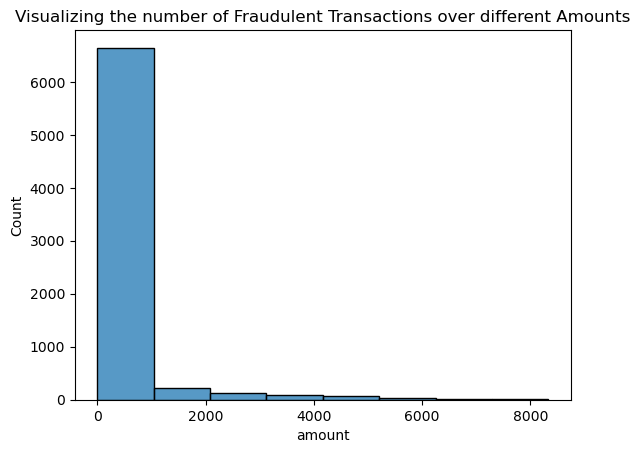

In [182]:
df3 = df[["amount", "fraud"]]
df3 = df3[df3["fraud"] == 1]
v0 = sns.histplot(data=df3, x="amount", bins=8)
v0.set(title="Visualizing the number of Fraudulent Transactions over different Amounts")
#df3['cat_age'] = np.select([df2.amount < 2000, df2.amount < 4000, df2.amount < 6000, df2.amount < 8000], ['<2000', '2000-4000','4000-6000','6000-8000'], '>8000')

<Axes: title={'center': 'Visualizing the number of Fraudulent Transactions for each Category'}, xlabel='Fraud Count', ylabel='Category'>

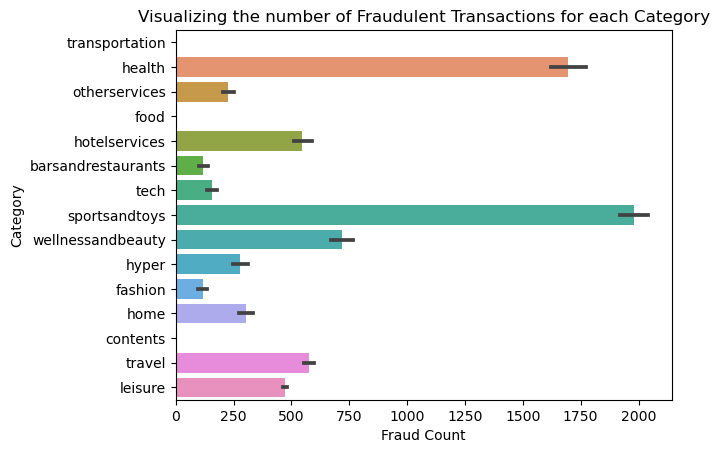

In [59]:
df_vis = df.copy()
df_vis["category"] = df_vis["category"].str.slice(4,-1)

v1 = sns.barplot(df_vis, x="fraud", y="category", estimator="sum")
v1.set(xlabel="Fraud Count", ylabel="Category", title="Visualizing the number of Fraudulent Transactions for each Category")
v1

<Axes: title={'center': 'Visualizing the Average Amount spent per Transaction for each Category'}, xlabel='Average Amount', ylabel='category'>

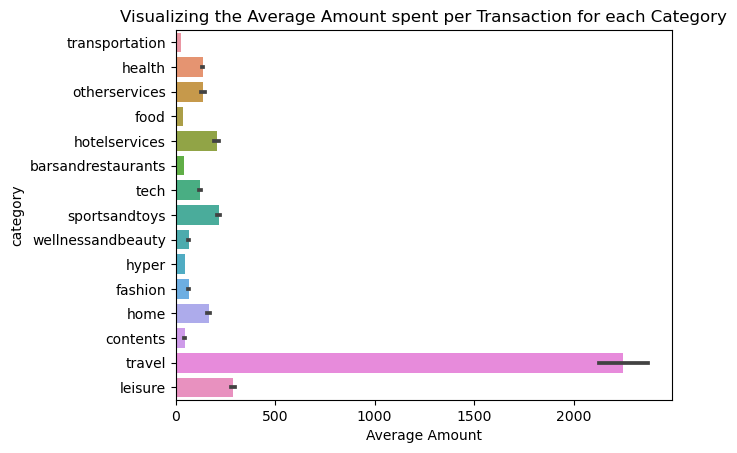

In [60]:
v2 = sns.barplot(df_vis, x="amount", y="category")
v2.set(xlabel="Average Amount", title="Visualizing the Average Amount spent per Transaction for each Category")
v2

In [10]:
print(len(df))
print(len(df[df['fraud'] == 0]))
print(len(df[df['fraud'] == 1]))

594643
587443
7200


In [11]:
from sklearn import model_selection
from prepareData import PrepareData

features = ['gender', 'category', 'amount']

X = df[features]
X = pd.get_dummies(X, dtype= float)
y = df['fraud']
X['label'] = df['fraud']

n_features = X.shape[1]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33)

train_data = PrepareData(X_train, y_train)
test_data = PrepareData(X_test, y_test)



In [12]:
pair = len(np.where(y_train == 0)[0]), len(np.where(y_train == 1)[0])
print(f'label train 0/1: {pair[0]}/{pair[1]}')


label train 0/1: 393659/4751


In [13]:
from torch.utils.data import DataLoader, WeightedRandomSampler

class_counts = y_train.value_counts()
class_weights = 1./class_counts

sample_weights = [1./class_counts[i] for i in y_train]
print(sample_weights)

sampler = WeightedRandomSampler(weights = sample_weights, num_samples = len(y_train), replacement = True)

train_dataloader = DataLoader(train_data, batch_size = 500, sampler = sampler)

# confirmation of proper batch distribution
#for i, (features, labels) in enumerate(train_dataloader):
    #print(f'Batch: {i}, label train 0/1: {len(np.where(labels.numpy() == 0)[0])}, {len(np.where(labels.numpy() == 1)[0])}')


[2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179145e-06, 2.5402696242179

In [14]:
from logRegModel import LogisticRegression

# instantiating logistic regression model
LR = LogisticRegression(n_features, 100)

# loss and optimizer
alpha = 0.001
loss_fn = nn.BCELoss()
opt = torch.optim.SGD(LR.parameters(), lr = alpha)

In [15]:
def calculate_accuracy(preds, actuals):

    with torch.no_grad():
        rounded_preds = torch.round(preds)
        n_correct = torch.sum(rounded_preds == actuals)
    return n_correct/len(preds)

In [16]:
# training loop
n_epochs = 1000

for epoch in range(n_epochs):
    
    features, labels = next(iter(train_dataloader))

    train_preds = LR(features)
    train_loss = loss_fn(train_preds, labels)

    train_acc = calculate_accuracy(train_preds, labels)

    # backwards propagation
    opt.zero_grad()
    train_loss.backward()

    # update w
    opt.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}, Loss = {train_loss.item():.3f}, Accuracy = {train_acc.item():.2f}')


Epoch: 10, Loss = 0.506, Accuracy = 0.64
Epoch: 20, Loss = 0.496, Accuracy = 0.61
Epoch: 30, Loss = 0.529, Accuracy = 0.55
Epoch: 40, Loss = 0.480, Accuracy = 0.66
Epoch: 50, Loss = 0.490, Accuracy = 0.61
Epoch: 60, Loss = 0.495, Accuracy = 0.60
Epoch: 70, Loss = 0.464, Accuracy = 0.81
Epoch: 80, Loss = 0.469, Accuracy = 0.62
Epoch: 90, Loss = 0.459, Accuracy = 0.66
Epoch: 100, Loss = 0.436, Accuracy = 0.72
Epoch: 110, Loss = 0.421, Accuracy = 0.70
Epoch: 120, Loss = 0.430, Accuracy = 0.75
Epoch: 130, Loss = 0.464, Accuracy = 0.71
Epoch: 140, Loss = 0.468, Accuracy = 0.70
Epoch: 150, Loss = 0.465, Accuracy = 0.67
Epoch: 160, Loss = 0.467, Accuracy = 0.73
Epoch: 170, Loss = 0.442, Accuracy = 0.72
Epoch: 180, Loss = 0.491, Accuracy = 0.72
Epoch: 190, Loss = 0.460, Accuracy = 0.66
Epoch: 200, Loss = 0.459, Accuracy = 0.72
Epoch: 210, Loss = 0.490, Accuracy = 0.74
Epoch: 220, Loss = 0.461, Accuracy = 0.70
Epoch: 230, Loss = 0.434, Accuracy = 0.72
Epoch: 240, Loss = 0.449, Accuracy = 0.77
E

In [17]:
test_preds = LR(test_data.X)
print(calculate_accuracy(test_preds, test_data.y))

tensor(0.7253)


In [18]:
from sklearn.metrics import confusion_matrix

train_preds = LR(train_data.X)

y_train_np = train_data.y.detach().numpy()
y_preds_np = train_preds.detach().numpy()

tn, fp, fn, tp = confusion_matrix(y_true= y_train_np, y_pred= np.round(y_preds_np)).ravel()

print(f'True Positive Rate on Training Data = {tp/(tp+fn)*100:.2f}%')
print(f'True Negative Rate on Training Data = {tn/(tn+fp) * 100:.2f}%')

True Positive Rate on Training Data = 96.82%
True Negative Rate on Training Data = 71.95%


In [19]:
test_preds = LR(test_data.X)

y_test_np = test_data.y.detach().numpy()
y_preds_np = test_preds.detach().numpy()

tn, fp, fn, tp = confusion_matrix(y_true= y_test_np, y_pred= np.round(y_preds_np)).ravel()

print(f'True Positive Rate on Testing Data = {tp/(tp+fn)*100:.2f}%')
print(f'True Negative Rate on Testing Data = {tn/(tn+fp) * 100:.2f}%')

True Positive Rate on Testing Data = 98.04%
True Negative Rate on Testing Data = 72.21%


# Decision Tree Model

In [154]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection


tree_model = DecisionTreeClassifier(random_state=0)

In [155]:
len(set(df['zipMerchant']))

1

In [158]:
print(df.columns)
cols = df.columns
cols = cols.drop(['customer', 'zipcodeOri', 'zipMerchant', 'fraud', 'step'])
X = df[cols]
X = pd.get_dummies(X, dtype= float)
y = df['fraud']

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')


In [159]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33)

In [160]:
torch.manual_seed(1)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [161]:
cross_val_score(tree_model, X_train, y_train, cv = 3)

array([0.99402879, 0.99411158, 0.99408146])

In [162]:
from sklearn.metrics import confusion_matrix

train_preds = tree_model.predict(X_train)
y_true = y_train

tn, fp, fn, tp = confusion_matrix(y_true= y_true, y_pred= train_preds).ravel()
print(f'True Positive Rate on Training Data = {tp/(tp+fn)*100:.2f}%')
print(f'True Negative Rate on Training Data = {tn/(tn+fp) * 100:.2f}%')

True Positive Rate on Training Data = 99.79%
True Negative Rate on Training Data = 100.00%


In [163]:
test_preds = tree_model.predict(X_test)
y_true = y_test

tn, fp, fn, tp = confusion_matrix(y_true= y_true, y_pred= test_preds).ravel()
print(f'True Positive Rate on Test Data = {tp/(tp+fn)*100:.2f}%')
print(f'True Negative Rate on Test Data = {tn/(tn+fp) * 100:.2f}%')

True Positive Rate on Test Data = 74.30%
True Negative Rate on Test Data = 99.69%


In [164]:
import numpy as np
assert len(X.columns) == len(tree_model.feature_importances_)

importance_data = {
    'feature': X.columns,
    'importance': tree_model.feature_importances_
}
imp = pd.DataFrame(importance_data).sort_values(by= 'importance', axis = 0, ascending = False)

In [165]:
imp.head(10)


feature  importance
0                   amount    0.734559
62   merchant_'M980657600'    0.054420
13  merchant_'M1053599405'    0.030280
36  merchant_'M1913465890'    0.020818
47   merchant_'M480139044'    0.017194
71   category_'es_leisure'    0.014413
70     category_'es_hyper'    0.009757
67    category_'es_health'    0.008291
15  merchant_'M1198415165'    0.007956
3                  age_'2'    0.007290

## Data Poisoning

Merchant-specific analysis for data poisoning. Here I am looking at the most important merchants in my decision tree, and determining whether they are important because they commit a lot of fraud or because they commit no fraud.

In [120]:
df4 = df[['merchant', 'fraud']]

m_98065_count = df4['merchant'].value_counts()["'M980657600'"]
m_10535_count = df4['merchant'].value_counts()["'M1053599405'"]
m_19134_count = df4['merchant'].value_counts()["'M1913465890'"]
m_48013_count = df4['merchant'].value_counts()["'M480139044'"]

df4 = df4.groupby('merchant')['fraud'].sum()
m_98065_fraud = df4["'M980657600'"]
m_10535_fraud = df4["'M1053599405'"]
m_19134_fraud = df4["'M1913465890'"]
m_48013_fraud = df4["'M480139044'"]

print(f'Rate of fraud for merchant M980657600:  {m_98065_fraud/m_98065_count:0.2f}%')
print(f'Rate of fraud for merchant M1053599405: {m_10535_fraud/m_10535_count:0.2f}%')
print(f'Rate of fraud for merchant M1913465890: {m_19134_fraud/m_19134_count:0.2f}%')
print(f'Rate of fraud for merchant M480139044:  {m_48013_fraud/m_48013_count:0.2f}%')

Rate of fraud for merchant M980657600:  0.83%
Rate of fraud for merchant M1053599405: 0.00%
Rate of fraud for merchant M1913465890: 0.00%
Rate of fraud for merchant M480139044:  0.47%


It seems that merchants M980657600 and M480139044 are important to the decision tree due to their high rates of fraud, while merchants M1053599405 and M1913465890 are important due to their extremely low rate of fraud.

In [121]:
df5 = df[['amount', 'fraud']].groupby('fraud').aggregate(np.mean)
df5


/var/folders/nr/wxklmm8n7v1986xxzzsjr73m0000gn/T/ipykernel_68012/2916388471.py:1: FutureWarning: The provided callable <function mean at 0x7fd32d8fbe50> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df5 = df[['amount', 'fraud']].groupby('fraud').aggregate(np.mean)


amount
fraud            
0       31.847230
1      530.926551

As we can see here, the dollar amount for fraudulent transactions are often far higher than the dollar amount for non-fraudulent transactions. Note that the mean dollar amount for fraudulant transactions is $31.85 and the mean for fraudulent transactions is $530.93. We will use these for the injection amounts in trying to manipulate the model. Therefore, a possible attack on this model could consist of either injecting data points with low-dollar amounts that come from merchants with high-fraud rates, or data points with high-dollar amounts that come from merchants with low-fraud rates. These data points will be classified as 'no fraud', and we will analyze how this injection impacts the overall accuracy of the model.

With the high-fraud rate merchant M980657600, do the low-dollar amount injection

In [122]:
m_98065_examples = df[df['merchant'] == "'M980657600'"]
m_98065_examples.head(10)

step       customer  age gender zipcodeOri      merchant zipMerchant  \
346      0  'C1082594377'  '2'    'F'    '28007'  'M980657600'     '28007'   
466      0  'C1817318774'  '2'    'F'    '28007'  'M980657600'     '28007'   
604      0  'C1685492470'  '2'    'F'    '28007'  'M980657600'     '28007'   
605      0  'C1275518867'  '5'    'F'    '28007'  'M980657600'     '28007'   
681      0   'C394488921'  '5'    'F'    '28007'  'M980657600'     '28007'   
865      0   'C212188289'  '4'    'M'    '28007'  'M980657600'     '28007'   
1004     0  'C1275518867'  '5'    'F'    '28007'  'M980657600'     '28007'   
1005     0  'C1685492470'  '2'    'F'    '28007'  'M980657600'     '28007'   
1202     0   'C375144053'  '6'    'F'    '28007'  'M980657600'     '28007'   
1203     0   'C375144053'  '6'    'F'    '28007'  'M980657600'     '28007'   

                category  amount  fraud  
346   'es_sportsandtoys'   88.20      0  
466   'es_sportsandtoys'  106.29      0  
604   'es_sportsandtoys'  278.02      1  
605   'es_sportsandtoys'   69.53      1  
681   'es_sportsandtoys'   21.56      0  
865   'es_sportsandtoys'   16.84      0  
1004  'es_sportsandtoys'  305.11      1  
1005  'es_sportsandtoys'  764.00      1  
1202  'es_sportsandtoys'  881.04      1  
1203  'es_sportsandtoys'   83.07      1

In [123]:
m_98065_injection = {
    'customer': ['C1082594377', 'C1817318774', 'C394488921', 'C212188289'],
    'age': ['2', '2', '5', '4'],
    'gender': ['F', 'F', 'F', 'M'],
    'zipcodeOri': ['28007', '28007', '28007', '28007'],
    'merchant': ['M980657600', 'M980657600', 'M980657600', 'M980657600'],
    'zipMerchant': ['28007', '28007', '28007', '28007'],
    'category': ['es_sportsandtoys', 'es_sportsandtoys', 'es_sportsandtoys', 'es_sportsandtoys'],
    'amount': [31.85, 31.85, 31.85, 31.85],
    'fraud': [0, 0, 0, 0]
}

m_98065_injection = pd.DataFrame.from_dict(m_98065_injection)

With the low-fraud rate merchant M1053599405, do the high-dollar amount injection

In [34]:
m_10535_examples = df[df['merchant'] == "'M1053599405'"]
m_10535_examples.head(10)

step       customer  age gender zipcodeOri       merchant zipMerchant  \
42       0  'C1635613216'  '4'    'F'    '28007'  'M1053599405'     '28007'   
79       0   'C118437987'  '2'    'M'    '28007'  'M1053599405'     '28007'   
131      0   'C650108285'  '4'    'F'    '28007'  'M1053599405'     '28007'   
160      0  'C1463833315'  '1'    'M'    '28007'  'M1053599405'     '28007'   
550      0  'C1810630647'  '2'    'F'    '28007'  'M1053599405'     '28007'   
727      0   'C563092648'  '6'    'F'    '28007'  'M1053599405'     '28007'   
803      0  'C1591152121'  '3'    'M'    '28007'  'M1053599405'     '28007'   
804      0  'C1092512638'  '3'    'F'    '28007'  'M1053599405'     '28007'   
998      0  'C1375103798'  '3'    'F'    '28007'  'M1053599405'     '28007'   
1190     0  'C1830336096'  '4'    'M'    '28007'  'M1053599405'     '28007'   

         category  amount  fraud  
42    'es_health'  105.59      0  
79    'es_health'  159.92      0  
131   'es_health'   11.83      0  
160   'es_health'    7.94      0  
550   'es_health'  105.54      0  
727   'es_health'  113.52      0  
803   'es_health'  142.49      0  
804   'es_health'  128.99      0  
998   'es_health'   74.25      0  
1190  'es_health'    0.72      0

In [35]:
m_10535_injection = {
    'customer': ['C1635613216', 'C118437987', 'C650108285', 'C1463833315'],
    'age': ['4', '2', '4', '1'],
    'gender': ['F', 'M', 'F', 'M'],
    'zipcodeOri': ['28007', '28007', '28007', '28007'],
    'merchant': ['M1053599405', 'M1053599405', 'M1053599405', 'M1053599405'],
    'zipMerchant': ['28007', '28007', '28007', '28007'],
    'category': ['es_health', 'es_health', 'es_health', 'es_health'],
    'amount': [530.93, 530.93, 530.93, 530.93],
    'fraud': [0, 0, 0, 0]
}

m_10535_injection = pd.DataFrame.from_dict(m_10535_injection)

Another possible attack could look at the least important features of a classification model, and try to heavily influence the outcomes regarding a specific person/business (i.e., merchant). For example, for a merchant whose ID is listed as very low on the decision tree, which likely means that there are very few data points involving that merchant, we could try to influence the model to always flag fraud on all transactions involving that merchant, without affecting the overall accuracy of the model.

In [124]:
non_imp = pd.DataFrame(importance_data).sort_values(by= 'importance', axis = 0, ascending = True)
non_imp.head(10)

feature  importance
77  category_'es_wellnessandbeauty'         0.0
21           merchant_'M1416436880'         0.0
26           merchant_'M1726401631'         0.0
31           merchant_'M1823072687'         0.0
58             merchant_'M85975013'         0.0
17           merchant_'M1313686961'         0.0
16           merchant_'M1294758098'         0.0
61             merchant_'M97925176'         0.0
14            merchant_'M117188757'         0.0
37           merchant_'M1946091778'         0.0

In [37]:
df6 = df[['merchant', 'fraud']]

m_67773_count = df6['merchant'].value_counts()["'M677738360'"]
print(m_67773_count)

358


It seems that merchant M677738360 is rated as a non-important feature by the decision tree, and has relatively few data points.

In [38]:
m_67773_examples = df[df['merchant'] == "'M677738360'"]
m_67773_examples.head(10)

step       customer  age gender zipcodeOri      merchant zipMerchant  \
1325      0  'C2120633706'  '1'    'F'    '28007'  'M677738360'     '28007'   
2937      1   'C712367267'  '5'    'F'    '28007'  'M677738360'     '28007'   
3489      1   'C980475207'  '4'    'F'    '28007'  'M677738360'     '28007'   
7805      3   'C270217031'  '3'    'F'    '28007'  'M677738360'     '28007'   
9323      3  'C1240746302'  '6'    'M'    '28007'  'M677738360'     '28007'   
9373      3  'C1438489717'  '3'    'F'    '28007'  'M677738360'     '28007'   
10311     4  'C1585648581'  '4'    'F'    '28007'  'M677738360'     '28007'   
10501     4   'C631654729'  '5'    'F'    '28007'  'M677738360'     '28007'   
11816     4   'C966984015'  '4'    'M'    '28007'  'M677738360'     '28007'   
11889     4    'C16680464'  '2'    'M'    '28007'  'M677738360'     '28007'   

            category  amount  fraud  
1325   'es_contents'   64.19      0  
2937   'es_contents'   48.27      0  
3489   'es_contents'   68.27      0  
7805   'es_contents'   33.82      0  
9323   'es_contents'   31.55      0  
9373   'es_contents'   68.58      0  
10311  'es_contents'    4.99      0  
10501  'es_contents'   22.58      0  
11816  'es_contents'    3.75      0  
11889  'es_contents'   43.24      0

In [39]:
m_67773_mean = round(m_67773_examples['amount'].mean(), 2)
m_67773_mean

44.48

In [40]:
m_67773_injection = {
    'customer': ['C2120633706', 'C712367267', 'C980475207', 'C270217031'],
    'age': ['1', '2', '3', '4'],
    'gender': ['F', 'M', 'F', 'M'],
    'zipcodeOri': ['28007', '28007', '28007', '28007'],
    'merchant': ['M677738360', 'M677738360', 'M677738360', 'M677738360'],
    'zipMerchant': ['28007', '28007', '28007', '28007'],
    'category': ['es_contents', 'es_contents', 'es_contents', 'es_contents'],
    'amount': [m_67773_mean, m_67773_mean, m_67773_mean, m_67773_mean],
    'fraud': [1, 1, 1, 1]
}

m_67773_injection = pd.DataFrame.from_dict(m_67773_injection)

For this injection, it will be interesting to see how many data points it takes for merchant M677738360 to be labeled as fraudulent consistently.

## Tristan Section

## Data Poisoning Test (Changing Rows: Targeting leisure)

In [75]:
imp.head(10)

feature  importance
1                   amount    0.643245
0                     step    0.086370
63   merchant_'M980657600'    0.054696
14  merchant_'M1053599405'    0.029901
48   merchant_'M480139044'    0.022360
37  merchant_'M1913465890'    0.020449
72   category_'es_leisure'    0.015364
68    category_'es_health'    0.011707
4                  age_'2'    0.007979
6                  age_'4'    0.007530

The two first categories that have the greatest impact on our models decisions are leisure and health. To attack these two categories, we needed to understand how they affected the model. 

In [167]:
X_change = df.copy()

In [168]:
X_leisure = X_change.loc[X_change['category'] == "'es_leisure'"]
X_leisure['fraud'].mean()

0.9498997995991983

The leisure category had a 95% fraud rate, and therefore likely influences the model to predict positive fraud given the leisure category. 

The training data 

In [169]:
X_health = X_change.loc[X_change['category'] == "'es_health'"]
X_health['fraud'].mean()

0.10512613896981343

In comparison, the health category had a 11% fraud rate, and therefore likely influences the model to predict negative fraud given the health category. 

We decided to attempt a new strategy for data poisoning, instead of adding new transactions to the dataset, we obtain random transactions and edit the category and fraud values. 

In [170]:
for i in range(3000):
    randInt = torch.randint(0, X_change.shape[0], (1,))
    if i%3 == 0:
        X_change.at[randInt, 'category'] = "'es_leisure'"
        X_change.at[randInt, 'fraud'] = 1
    else: 
        X_change.at[randInt, 'category'] = "'es_health'"
        X_change.at[randInt, 'fraud'] = 0 

In [171]:
X_leisure_changed = X_change.loc[X_change['category'] == "'es_leisure'"]
X_leisure_changed['fraud'].mean()

0.9832439678284183

In [172]:
X_health_changed = X_change.loc[X_change['category'] == "'es_health'"]
X_health_changed['fraud'].mean()

0.09338650714523097

In [173]:
cols = X_change.columns
cols = cols.drop(['customer', 'zipcodeOri', 'zipMerchant', 'fraud', 'step'])
X = X_change[cols]
X = pd.get_dummies(X, dtype= float)
y = X_change['fraud']

In [174]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33)

In [175]:
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [176]:
cross_val_score(tree_model, X_train, y_train, cv = 3)

array([0.99378031, 0.99398357, 0.99332093])

In [177]:
from sklearn.metrics import confusion_matrix

train_preds = tree_model.predict(X)
y_true = y

tn, fp, fn, tp = confusion_matrix(y_true= y_true, y_pred= train_preds).ravel()
print(f'True Positive Rate on Dataset = {tp/(tp+fn)*100:.2f}%')
print(f'True Negative Rate on Dataset = {tn/(tn+fp) * 100:.2f}%')

True Positive Rate on Dataset = 92.59%
True Negative Rate on Dataset = 99.89%


In [178]:
test_preds = tree_model.predict(X_test)
y_true = y_test

tn, fp, fn, tp = confusion_matrix(y_true= y_true, y_pred= test_preds).ravel()
print(f'True Positive Rate on Test Data = {tp/(tp+fn)*100:.2f}%')
print(f'True Negative Rate on Test Data = {tn/(tn+fp) * 100:.2f}%')

True Positive Rate on Test Data = 77.90%
True Negative Rate on Test Data = 99.67%


In [179]:
import numpy as np
assert len(X.columns) == len(tree_model.feature_importances_)

data = {
    'feature': X.columns,
    'importance': tree_model.feature_importances_
}
imp = pd.DataFrame(data).sort_values(by= 'importance', axis = 0, ascending = False)

In [181]:
imp.head(20)

feature  importance
0                   amount    0.633693
71   category_'es_leisure'    0.136131
62   merchant_'M980657600'    0.050996
13  merchant_'M1053599405'    0.022398
47   merchant_'M480139044'    0.020066
36  merchant_'M1913465890'    0.014407
34  merchant_'M1873032707'    0.008273
56   merchant_'M855959430'    0.008118
15  merchant_'M1198415165'    0.007378
5                  age_'4'    0.007037
3                  age_'2'    0.006789
11              gender_'M'    0.006418
10              gender_'F'    0.006226
4                  age_'3'    0.005471
67    category_'es_health'    0.005354
6                  age_'5'    0.004729
2                  age_'1'    0.004403
52   merchant_'M692898500'    0.003788
41  merchant_'M2122776122'    0.003230
68      category_'es_home'    0.003115

# References
